In [1]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#Inspect the data to preview the details
from sqlalchemy import inspect
inspector = inspect(engine)

In [10]:
# Using the inspector to print the column names within the measurement table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Using the inspector to print the column names within the station table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent date is {recent_dt[0]}")

The most recent date is 2017-08-23


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

last_date = dt.datetime.strptime(recent_dt[0], '%Y-%m-%d')
query_date = dt.date(last_date.year -1, last_date.month, last_date.day)
query_date

# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date,Measurement.prcp]
query_result = session.query(*sel).filter(Measurement.date >= query_date).all()

precipitation = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precipitation = precipitation.dropna(how='any') # clean up non value entries


# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation = precipitation.set_index("Date")

# Sort the dataframe by date
precipitation = precipitation.sort_values(["Date"], ascending=True)

#Display the top of the dataframe
precipitation.head(10)


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


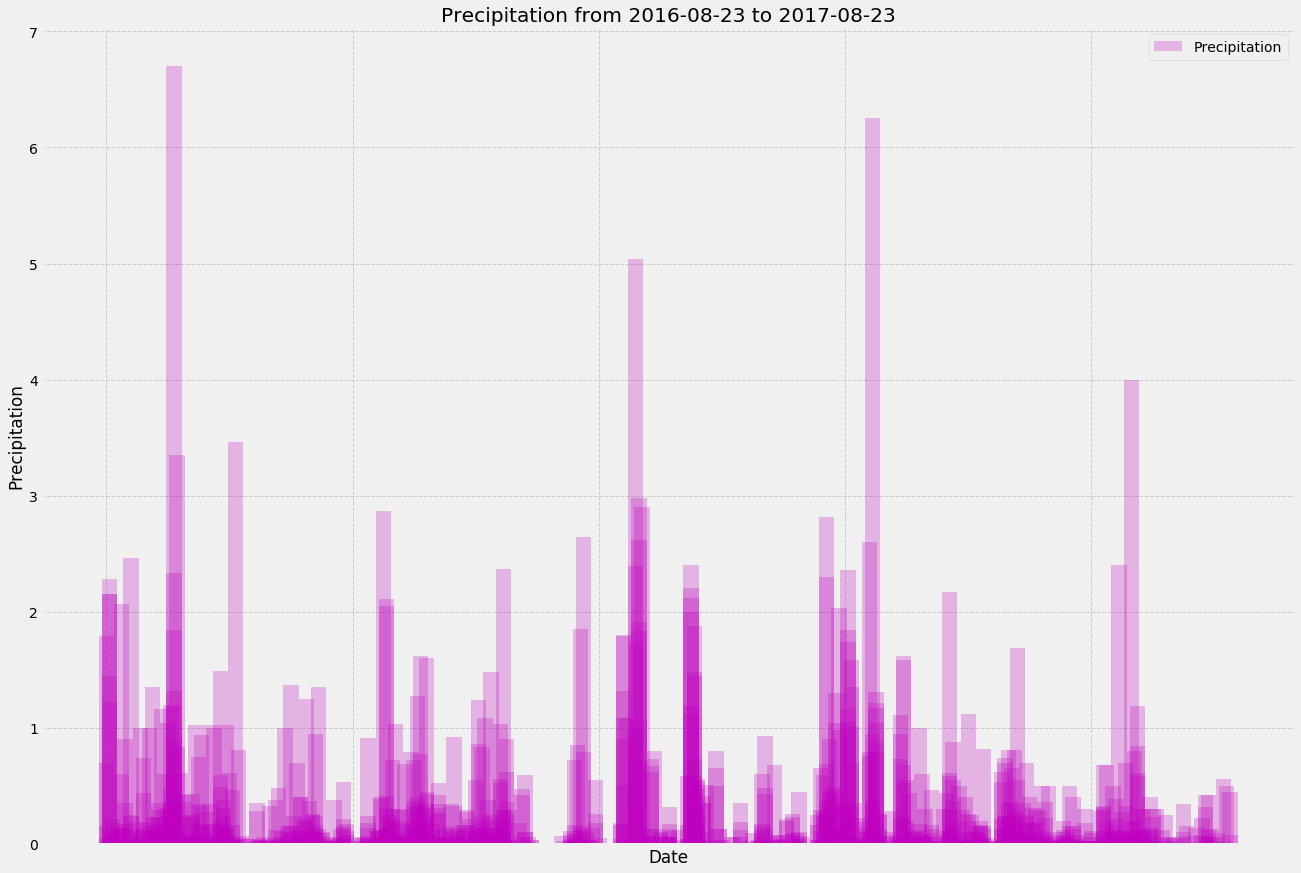

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data

x = precipitation.index.tolist()
y = precipitation['Precipitation'].tolist()

plt.figure(figsize=(20,14))
plt.bar(x,y,width = 5 ,color='m', alpha=.25, align="center",label='Precipitation')
plt.tick_params(
      axis='x',          
      which='both',      
      bottom=True,     
      top=False,         
      labelbottom=False) 
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

plt.title(f"Precipitation from {query_date} to {recent_dt[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='--')
plt.legend()

#save fig
plt.savefig("Resources/Precipitation_plot.png")
#show plot
plt.show()

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()